# Page Setup
---

In [84]:
# Load Classes from the App
import sys
sys.path.append('../')

from app.transforms import FFT, IFFT, CreateOnesMask
from app.filters import CreateKernel, Convolve, Canny, HOG
from app.imager import ImageLoader, DefectViewer, Show, Exposure

import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

## About
---

## Load Data
---

In [4]:
# Create an image loading object
img_load = ImageLoader(shuffle=True, defect_class=None)

# Load 5 Samples of Each defect
img_load.load_n(5, defect_classes='Resistive')

,filename,bounding_box_coords,annotation_shape,region_shape_attributes,defect_class,fileloc
48174,M0628C049000.jpg,"[47, 164, 105, 175]",polygon,"{""name"":""polygon"",""all_points_x"":[164,163,87,6...",Resistive,/home/dan/Documents/git/w281_finalproject_sola...
36979,M0414C039100.jpg,"[81, 295, 188, 291]",polygon,"{""name"":""polygon"",""all_points_x"":[102,111,87,8...",Resistive,/home/dan/Documents/git/w281_finalproject_sola...
59678,M0644C001000.jpg,"[87, 105, 197, 268]",polygon,"{""name"":""polygon"",""all_points_x"":[87,88,101,10...",Resistive,/home/dan/Documents/git/w281_finalproject_sola...
64860,M0773C033100.jpg,"[184, 276, 81, 235]",polygon,"{""name"":""polygon"",""all_points_x"":[274,271,255,...",Resistive,/home/dan/Documents/git/w281_finalproject_sola...
30171,M0393C016000.jpg,"[6, 19, 245, 288]",polygon,"{""name"":""polygon"",""all_points_x"":[8,19,17,15,6...",Resistive,/home/dan/Documents/git/w281_finalproject_sola...


In [ ]:
n_samples = 1  # Number of samples of images
image_df = ImageLoader(defect_class='Resistive') << n_samples
images = DefectViewer() << image_df

## Remove Busbars
---
[Link](https://stackoverflow.com/questions/46274961/removing-horizontal-lines-in-image-opencv-python-matplotlib)

# Base Model
---

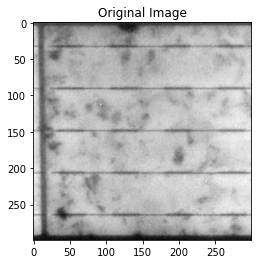

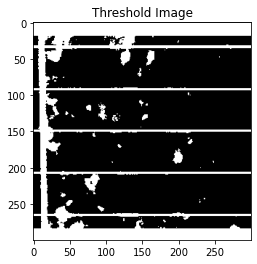

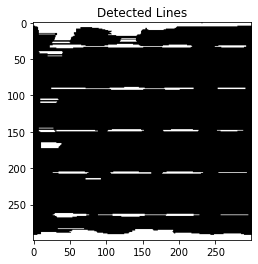

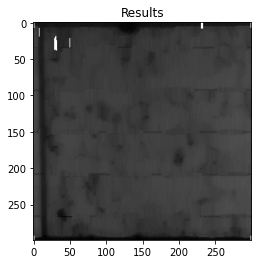

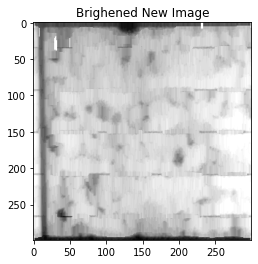

In [255]:
# get current directory
path = os.getcwd()
 
# get parrent directory
parent_path = os.path.abspath(os.path.join(path, os.pardir))

# Import Image
pth = os.path.join(parent_path, 'data', 'images', 'train', 'M0751C053100.jpg')
gray = cv2.imread(pth, 0)

plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.show()

# Otsus Thresholds to Convert to Black and White
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]        

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(gray, [c], -1, (255,255,255), 2)
    
# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - gray, cv2.MORPH_CLOSE, repair_kernel, iterations=2)

plt.imshow(output_array, cmap='gray')
plt.title('Threshold Image')
plt.show()

plt.imshow(detected_lines, cmap='gray')
plt.title('Detected Lines')
plt.show()


plt.imshow(result, cmap='gray')
plt.title('Results')
plt.show()

# Brighten Image
value = 150
grey_new = np.where((255 - result) < value,255,result+value)

plt.imshow(grey_new, cmap='gray')
plt.title('Brighened New Image')
plt.show()

## Extended Line Method
---

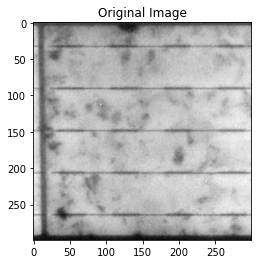

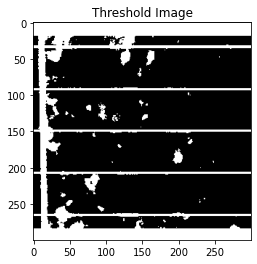

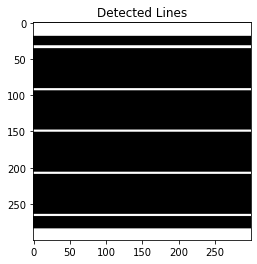

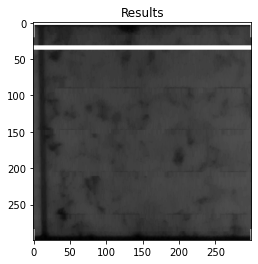

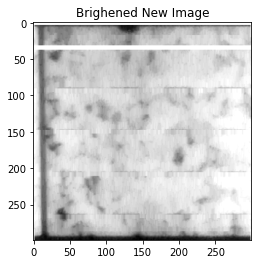

In [251]:
# get current directory
path = os.getcwd()
 
# get parrent directory
parent_path = os.path.abspath(os.path.join(path, os.pardir))

# Import Image
pth = os.path.join(parent_path, 'data', 'images', 'train', 'M0751C053100.jpg')
gray = cv2.imread(pth, 0)

plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.show()

# Otsus Thresholds to Convert to Black and White
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

output_array = np.zeros(thresh.shape[1])

# Extend. Threshold line. If 50% of line > 0 then set to 255
for row in thresh:
#     print((row > 200).sum()/len(row))
    if ((row > 200).sum()/len(row)) > 0.3:
        output_array = np.vstack((output_array, np.full((1, len(row)), 255)))
#         np.full((1, len(row)), 255)
    else:
        output_array = np.vstack((output_array, row))
                                 
thresh = output_array.astype('uint8')
        

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=5)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(gray, [c], -1, (255,255,255), 2)
    
# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - gray, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

plt.imshow(output_array, cmap='gray')
plt.title('Threshold Image')
plt.show()

plt.imshow(detected_lines, cmap='gray')
plt.title('Detected Lines')
plt.show()


plt.imshow(result, cmap='gray')
plt.title('Results')
plt.show()

# Brighten Image
value = 150
grey_new = np.where((255 - result) < value,255,result+value)

plt.imshow(grey_new, cmap='gray')
plt.title('Brighened New Image')
plt.show()

## Adding a Sobel Convolution

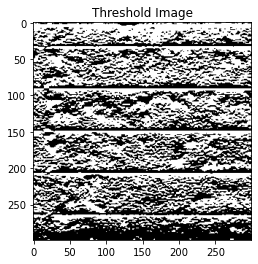

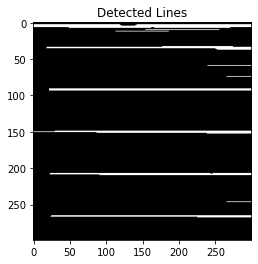

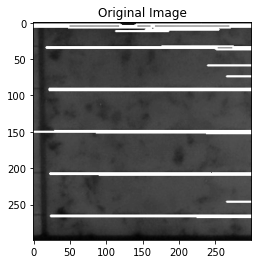

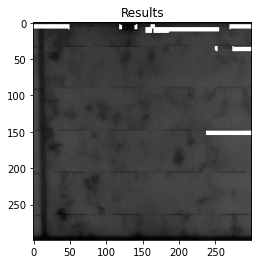

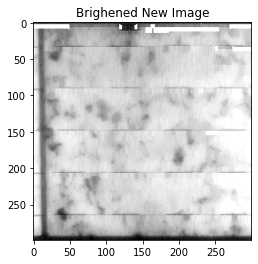

In [130]:
# Sobel Kernal with Dim 2

# get current directory
path = os.getcwd()
 
# get parrent directory
parent_path = os.path.abspath(os.path.join(path, os.pardir))

# Import Image
pth = os.path.join(parent_path, 'data', 'images', 'train', 'M0751C053100.jpg')
gray = cv2.imread(pth, 0)

# Convolve
c_imgs = Convolve(axis=-2) << (CreateKernel(dim=2, kernel='sobel', axis=1) << gray)

# Otsus Thresholds to Convert to Black and White
thresh = cv2.threshold(c_imgs[1], 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (35,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(gray, [c], -1, (255,255,255), 2)
    
# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - gray, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

plt.imshow(thresh, cmap='gray')
plt.title('Threshold Image')
plt.show()

plt.imshow(detected_lines, cmap='gray')
plt.title('Detected Lines')
plt.show()

plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.show()

plt.imshow(result, cmap='gray')
plt.title('Results')
plt.show()

# Brighten Image
value = 150
grey_new = np.where((255 - result) < value,255,result+value)

plt.imshow(grey_new, cmap='gray')
plt.title('Brighened New Image')
plt.show()

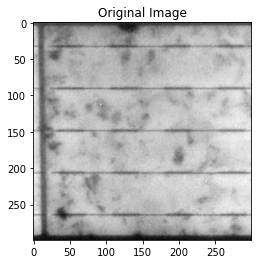

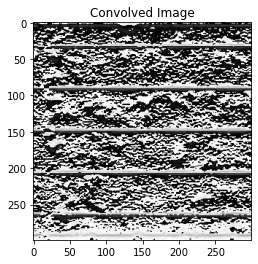

[[  0 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
<class 'numpy.ndarray'>


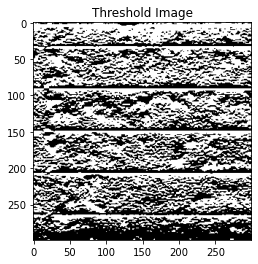

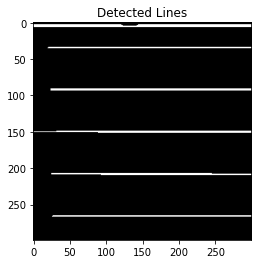

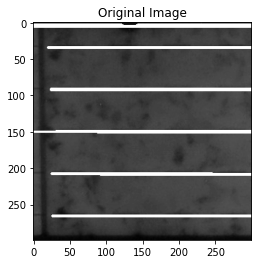

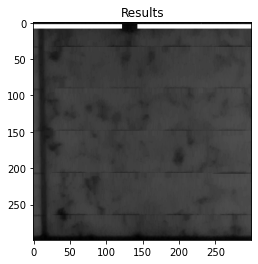

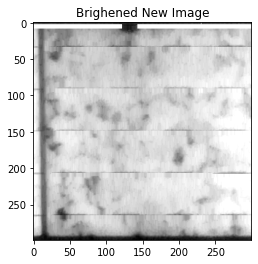

In [191]:
# Sobel Kernal with dim 10

# get current directory
path = os.getcwd()
 
# get parrent directory
parent_path = os.path.abspath(os.path.join(path, os.pardir))

# Import Image
pth = os.path.join(parent_path, 'data', 'images', 'train', 'M0751C053100.jpg')
gray = cv2.imread(pth, 0)

plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.show()

# Convolve
c_imgs = Convolve(axis=-2) << (CreateKernel(dim=10, kernel='sobel', axis=1) << gray)

plt.imshow(c_imgs[1], cmap='gray')
plt.title('Convolved Image')
plt.show()

# Otsus Thresholds to Convert to Black and White
thresh = cv2.threshold(c_imgs[1], 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
print(thresh)
print(type(thresh))

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (80,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(gray, [c], -1, (255,255,255), 2)
    
# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - gray, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

plt.imshow(thresh, cmap='gray')
plt.title('Threshold Image')
plt.show()

plt.imshow(detected_lines, cmap='gray')
plt.title('Detected Lines')
plt.show()

plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.show()

plt.imshow(result, cmap='gray')
plt.title('Results')
plt.show()

# Brighten Image
value = 150
grey_new = np.where((255 - result) < value,255,result+value)

plt.imshow(grey_new, cmap='gray')
plt.title('Brighened New Image')
plt.show()

## Double pass through sobel Filter
---

In [ ]:
n_samples = 1  # Number of samples of images
image_df = ImageLoader(defect_class='Resistive') << n_samples
images = DefectViewer() << image_df

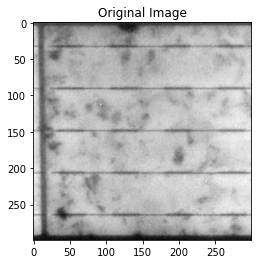

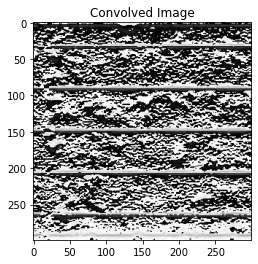

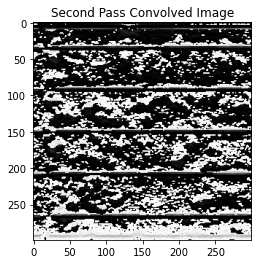

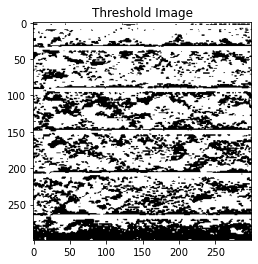

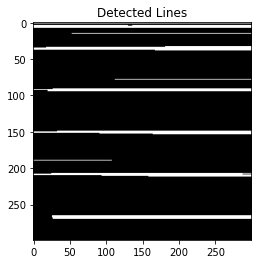

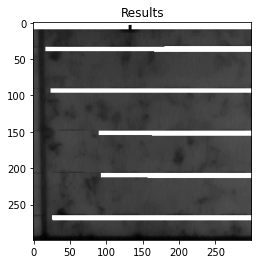

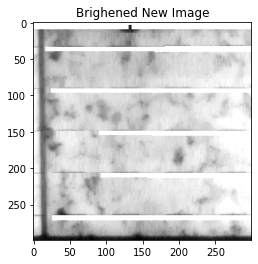

In [209]:
# Sobel Kernal with dim 10

# get current directory
path = os.getcwd()
 
# get parrent directory
parent_path = os.path.abspath(os.path.join(path, os.pardir))

# Import Image
pth = os.path.join(parent_path, 'data', 'images', 'train', 'M0751C053100.jpg')
gray = cv2.imread(pth, 0)

plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.show()

# Convolve
c_imgs = Convolve(axis=-2) << (CreateKernel(dim=10, kernel='sobel', axis=1) << gray)

plt.imshow(c_imgs[1], cmap='gray')
plt.title('Convolved Image')
plt.show()

# Otsus Thresholds to Convert to Black and White
thresh = cv2.threshold(c_imgs[1], 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (80,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(gray, [c], -1, (255,255,255), 2)
    
# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - gray, cv2.MORPH_CLOSE, repair_kernel, iterations=1)


# Second Pass
c_imgs = Convolve(axis=-2) << (CreateKernel(dim=10, kernel='sobel', axis=1) << result)
plt.imshow(c_imgs[1], cmap='gray')
plt.title('Second Pass Convolved Image')
plt.show()

# Otsus Thresholds to Convert to Black and White
thresh = cv2.threshold(c_imgs[1], 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (100,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(gray, [c], -1, (255,255,255), 2)
    
# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - gray, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

plt.imshow(thresh, cmap='gray')
plt.title('Threshold Image')
plt.show()

plt.imshow(detected_lines, cmap='gray')
plt.title('Detected Lines')
plt.show()

plt.imshow(result, cmap='gray')
plt.title('Results')
plt.show()

# Brighten Image
value = 150
grey_new = np.where((255 - result) < value,255,result+value)

plt.imshow(grey_new, cmap='gray')
plt.title('Brighened New Image')
plt.show()

In [160]:
n_samples = 1  # Number of samples of images
image_df = ImageLoader(defect_class='Resistive') << n_samples
images = DefectViewer() << image_df


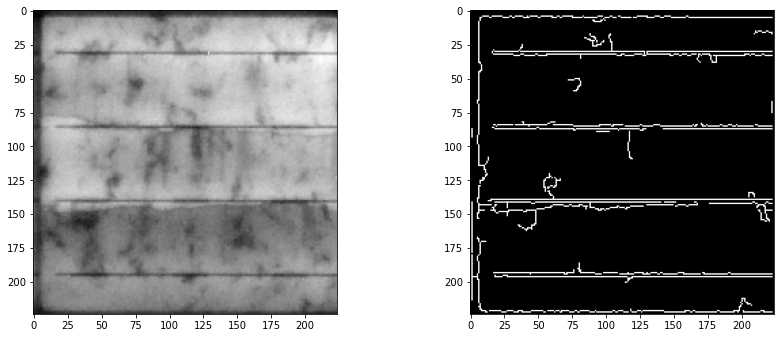

In [165]:
_ = Show('canny', do_show=True) << (Canny(sigma=0) <<  images)

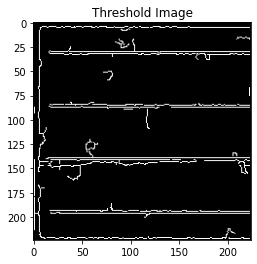

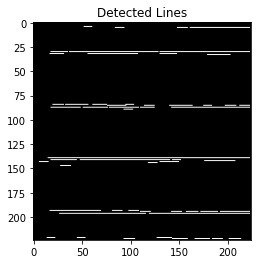

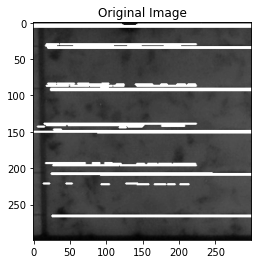

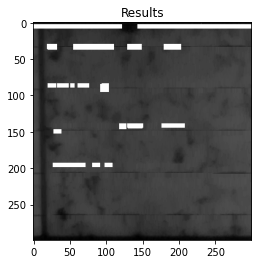

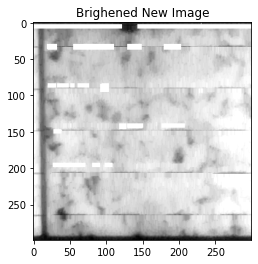

In [197]:
thresh = Canny(sigma=0) <<  images
thresh = thresh[1][0].astype(int) * 255
thresh = thresh.astype('uint8')

# # # Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(gray, [c], -1, (255,255,255), 2)
    
# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - gray, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

plt.imshow(thresh, cmap='gray')
plt.title('Threshold Image')
plt.show()

plt.imshow(detected_lines, cmap='gray')
plt.title('Detected Lines')
plt.show()

plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.show()

plt.imshow(result, cmap='gray')
plt.title('Results')
plt.show()

# Brighten Image
value = 150
grey_new = np.where((255 - result) < value,255,result+value)

plt.imshow(grey_new, cmap='gray')
plt.title('Brighened New Image')
plt.show()

In [229]:
print(np.full((1, len(row)), 255))

[[7 7 7 7 7]]
